In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the dataset
file_path = 'Shopping Mall Customer Segmentation Data .csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())


                            Customer ID  Age  Gender  Annual Income  \
0  d410ea53-6661-42a9-ad3a-f554b05fd2a7   30    Male         151479   
1  1770b26f-493f-46b6-837f-4237fb5a314e   58  Female         185088   
2  e81aa8eb-1767-4b77-87ce-1620dc732c5e   62  Female          70912   
3  9795712a-ad19-47bf-8886-4f997d6046e3   23    Male          55460   
4  64139426-2226-4cd6-bf09-91bce4b4db5e   24    Male         153752   

   Spending Score  
0              89  
1              95  
2              76  
3              57  
4              76  


In [2]:
# Check for missing values
print(df.isnull().sum())

# Convert 'Gender' column to numerical values (Male: 0, Female: 1)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Selecting relevant features for clustering (Annual Income and Spending Score)
X = df[['Annual Income', 'Spending Score']].values

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Customer ID       0
Age               0
Gender            0
Annual Income     0
Spending Score    0
dtype: int64


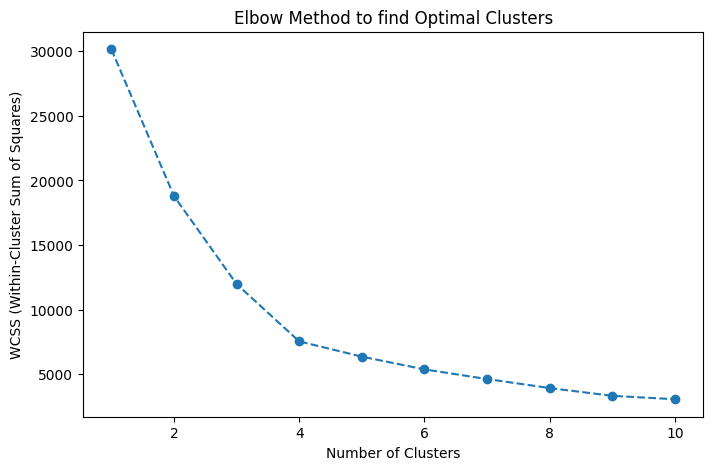

In [3]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to find Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


In [4]:
# Based on the elbow method, let's assume 4 clusters as optimal
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataframe
df['Cluster'] = labels

# Display the first few rows with the cluster labels
print(df.head())


                            Customer ID  Age  Gender  Annual Income  \
0  d410ea53-6661-42a9-ad3a-f554b05fd2a7   30       0         151479   
1  1770b26f-493f-46b6-837f-4237fb5a314e   58       1         185088   
2  e81aa8eb-1767-4b77-87ce-1620dc732c5e   62       1          70912   
3  9795712a-ad19-47bf-8886-4f997d6046e3   23       0          55460   
4  64139426-2226-4cd6-bf09-91bce4b4db5e   24       0         153752   

   Spending Score  Cluster  
0              89        2  
1              95        2  
2              76        1  
3              57        1  
4              76        2  


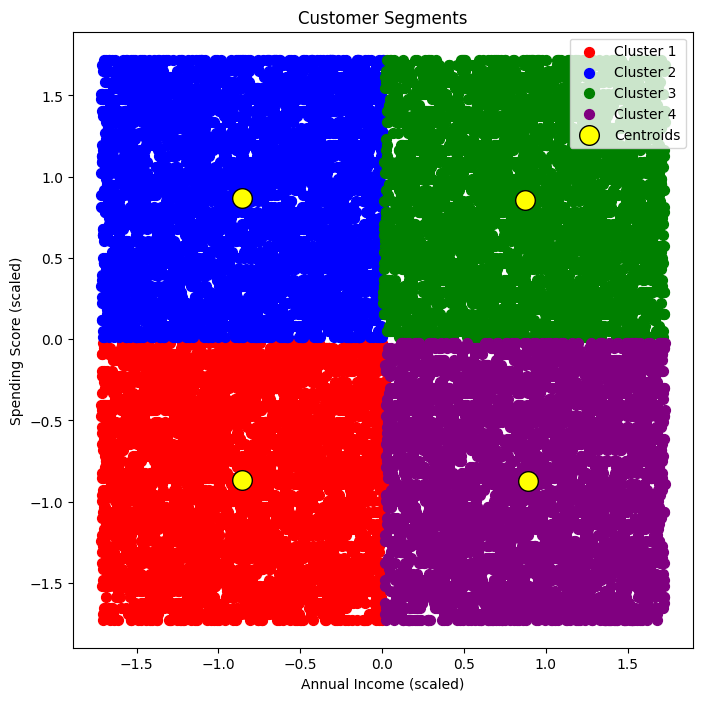

In [5]:
# Plotting the clusters
plt.figure(figsize=(8, 8))
plt.scatter(X_scaled[labels == 0, 0], X_scaled[labels == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X_scaled[labels == 1, 0], X_scaled[labels == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X_scaled[labels == 2, 0], X_scaled[labels == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(X_scaled[labels == 3, 0], X_scaled[labels == 3, 1], s=50, c='purple', label='Cluster 4')

# Plotting centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', label='Centroids', edgecolor='black')

plt.title('Customer Segments')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()


In [6]:
# Calculate the silhouette score for evaluating clustering performance
sil_score = silhouette_score(X_scaled, labels)
print(f'Silhouette Score: {sil_score:.2f}')


Silhouette Score: 0.41
